In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pickle
import time

/Users/mahshid/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('train_data.csv', index_col=0)
X = df.drop("output",axis = 1)
y = df["output"]
df_test = pd.read_csv('test_data.csv', index_col=0)
X_test = df_test.drop("output",axis = 1)
y_test = df_test["output"]

In [3]:
param_grid = {'C': [0.01, 0.1, 1, 10], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}
t = time.time()  
grid = GridSearchCV(SVC(), param_grid, cv=StratifiedKFold(), verbose = 3)
grid.fit(X, y)
print("time: ", time.time() - t)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.465 total time=   8.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.465 total time=   7.1s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.465 total time=   7.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.465 total time=   6.9s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.465 total time=   7.0s
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.891 total time=   1.2s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.892 total time=   1.1s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.891 total time=   1.1s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.877 total time=   1.2s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.874 total time=   1.1s
[CV 1/5] END ......C=0.01, gamma=1, kernel=poly;, score=0.829 total time=  10.9s
[CV 2/5] END ......C=0.01, gamma=1, kernel=poly

[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.465 total time=   7.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.465 total time=   7.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.465 total time=   7.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.465 total time=   7.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.899 total time=   1.8s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.903 total time=   1.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.901 total time=   1.7s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.892 total time=   1.7s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.883 total time=   1.7s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.829 total time=  10.9s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.841 total time=  11.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.854 total time=  10.7s
[CV 4/5] END .......C=0.1, g

[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.465 total time=   7.5s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.465 total time=   7.5s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.894 total time=   6.3s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.906 total time=   6.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.897 total time=   6.2s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.888 total time=   6.3s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.881 total time=   6.5s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.829 total time=  10.9s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.841 total time=  11.1s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.854 total time=  11.0s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.859 total time=  13.5s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.840 total time=   8.4s
[CV 1/5] END ......C=1, gamm

[CV 1/5] END ......C=10, gamma=1, kernel=linear;, score=0.892 total time=  51.3s
[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.900 total time=  51.1s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.892 total time= 1.2min
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.885 total time= 1.0min
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.886 total time= 1.0min
[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.829 total time=  13.7s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.841 total time=  13.8s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.854 total time=  10.9s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.859 total time=  15.8s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.840 total time=  11.0s
[CV 1/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.465 total time=   3.3s
[CV 2/5] END .....C=10, gamma=1, kernel=sigmoid;, score=0.465 total time=   2.1s
[CV 3/5] END .....C=10, gamm

In [5]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1, kernel='linear')


In [7]:

param_grid = {'C': [0.01], 
              'gamma': [1],
              'kernel': ['linear']}
t = time.time()  
grid = GridSearchCV(SVC(), param_grid, cv=StratifiedKFold(), verbose = 3)
grid.fit(X, y)
grid_predictions = grid.predict(X)
y_pred =  grid.predict(X)
print("time: ", time.time() - t)
print(classification_report(y, grid_predictions))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.891 total time=   1.5s
[CV 2/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.892 total time=   1.6s
[CV 3/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.891 total time=   1.3s
[CV 4/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.877 total time=   1.2s
[CV 5/5] END ....C=0.01, gamma=1, kernel=linear;, score=0.874 total time=   1.2s
time:  11.197596073150635
              precision    recall  f1-score   support

           1       0.72      0.90      0.80       268
           2       0.84      0.70      0.76      1410
           3       0.86      0.78      0.82       313
           4       0.89      0.95      0.92      3538
           5       0.95      0.95      0.95      1543
           6       0.99      0.95      0.97       535

    accuracy                           0.89      7607
   macro avg       0.88      0.87      0.87      7607
weighted avg       0.8

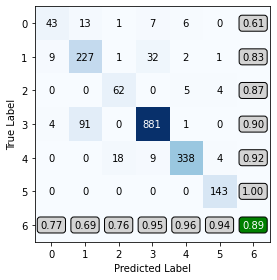

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred_test)

report = classification_report(y_test, y_pred_test, output_dict=True)

precision = [report[str(i)]['precision'] for i in report.keys() if i.isdigit()]
recall = [report[str(i)]['recall'] for i in report.keys() if i.isdigit()]
accuracy = report['accuracy']

confusion_transposed = confusion.T

confusion_with_metrics = np.vstack([confusion_transposed, recall])
confusion_with_metrics = np.column_stack([confusion_with_metrics, np.append(precision, accuracy)])

fig, ax = plt.subplots()
im = ax.imshow(confusion_with_metrics, cmap="Blues")

for i in range(confusion_with_metrics.shape[0]):
    for j in range(confusion_with_metrics.shape[1]):
        if i == confusion_with_metrics.shape[0] - 1 or j == confusion_with_metrics.shape[1] - 1:
            # Change background color of the whole cell in the last row and last column to green
            if i == confusion_with_metrics.shape[0] - 1 and j == confusion_with_metrics.shape[1] - 1:
                # Change color of the number in the cell at [-1, -1] to white
                color = "white"
                # Change background color of the cell at [-1, -1] to green
                background_color = "green"
            else:
                color = "k"
                background_color = "lightgray"
            im.axes.text(j, i, "{:.2f}".format(confusion_with_metrics[i, j]), ha="center", va="center", color=color, bbox=dict(facecolor=background_color, edgecolor='black', boxstyle='round,pad=0.3'))
        else:
            cl = "k"
            if (i == confusion_with_metrics.shape[0] - 1 and j == confusion_with_metrics.shape[1] - 1):
                # Change color of the cell at [-1, -1] to violet
                cl = "violet"
            elif (confusion_with_metrics[i, j] - np.min(confusion_with_metrics)) / (np.max(confusion_with_metrics) - np.min(confusion_with_metrics)) > 3 / 4:
                cl = "w"
            text = ax.text(j, i, "{:.0f}".format(confusion_with_metrics[i, j]), ha="center", va="center", color=cl)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
fig.tight_layout()
fig.savefig("modified_svmconfusion.png")
plt.show()


In [11]:
path = "/Users/mahshid/Documents/ML_Algebra/Database/4/4_errors/"
df = pd.DataFrame(columns = ["T_SVM", "P_SVM"], index = y_test.index) 
df.T_SVM = y_test
df.P_SVM = y_pred_test
df = df[y_test != y_pred_test]
df.to_csv(path + "4_SVM_errors.csv")

In [10]:
path = "/Users/mahshid/Documents/ML_Algebra/Database/4/4_errors/"
with open(path + 'T_SVM_test.pickle', 'wb') as handle:
    pickle.dump(list(y_test[y_test != y_pred_test]) , handle, protocol=pickle.HIGHEST_PROTOCOL)   
    
with open(path + 'P_SVM_test.pickle', 'wb') as handle:
    pickle.dump(list(y_pred_test[y_test != y_pred_test]) , handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open(path + 'T_SVM.pickle', 'rb') as handle:
    T_KNN = pickle.load(handle)
        
with open(path + 'P_SVM.pickle'.format(i), 'rb') as handle:
    P_KNN = pickle.load(handle)  

In [19]:
len(P_KNN)

914